In [86]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st

In [87]:
# Параметры
a = 0  # математическое ожидание
sigma2 = 2  # дисперсия
sigma = np.sqrt(sigma2)  # стандартное отклонение
gamma = 0.91  # доверительная вероятность
n = 20  # объем выборки
M = 1750  # количество выборок
k = 140  # количество выборок для случайной величины W


In [88]:
# 1.1 Интервальная оценка для математического ожидания при известной дисперсии
X = np.random.normal(a, sigma, size=n)
t_gamma = st.norm.ppf(1/2 + gamma/2)
a_left_known = X.mean() - sigma * t_gamma / np.sqrt(n)
a_right_known = X.mean() + sigma * t_gamma / np.sqrt(n)
print("1.1. Доверительный интервал (известная дисперсия):", (a_left_known, a_right_known))


1.1. Доверительный интервал (известная дисперсия): (-0.9228750707840063, 0.14938859007483418)


In [89]:
# 1.2 Интервальная оценка для математического ожидания при неизвестной дисперсии
sigma_estimate = np.std(X, ddof=1)
t_gamma_unknown = st.t.ppf(1/2 + gamma/2, df=n-1)
a_left_unknown = X.mean() - sigma_estimate * t_gamma_unknown / np.sqrt(n)
a_right_unknown = X.mean() + sigma_estimate * t_gamma_unknown / np.sqrt(n)
print("1.2. Доверительный интервал (неизвестная дисперсия):", (a_left_unknown, a_right_unknown))


1.2. Доверительный интервал (неизвестная дисперсия): (-0.8953531548971703, 0.12186667418799813)


In [90]:
# 1.3 Интервальная оценка для дисперсии
delta_0 = st.chi2.ppf(1/2 + gamma/2, df=n-1)
delta_1 = st.chi2.ppf(1/2 - gamma/2, df=n-1)
s2 = np.var(X, ddof=1)
sigma2_left = (n - 1) * s2 / delta_0
sigma2_right = (n - 1) * s2 / delta_1
print("1.3. Доверительный интервал для дисперсии:", (sigma2_left, sigma2_right))


1.3. Доверительный интервал для дисперсии: (1.007674468329406, 3.1065170700228726)


In [91]:
# 2. Зависимость длины доверительного интервала от надежности
V = 500
gamma_values = np.linspace(0.7, 0.999, V)
interval_lengths_mx = []
interval_lengths_var = []
interval_lengths_mx_unknown = []

for g in gamma_values:
    t_gamma_unkn = st.t.ppf(1/2 + g/2, df=n-1)
    interval_mx_unknown = 2 * sigma_estimate * t_gamma_unkn / np.sqrt(n)
    t_gamma = st.norm.ppf(1/2 + g/2)
    interval_mx = 2 * sigma * t_gamma / np.sqrt(n)
    delta_0 = st.chi2.ppf(1/2 + g/2, df=n-1)
    delta_1 = st.chi2.ppf(1/2 - g/2, df=n-1)
    interval_var = (n - 1) * s2 * (1/delta_1 - 1/delta_0)
    interval_lengths_mx_unknown.append(interval_mx_unknown)
    interval_lengths_mx.append(interval_mx)
    interval_lengths_var.append(interval_var)


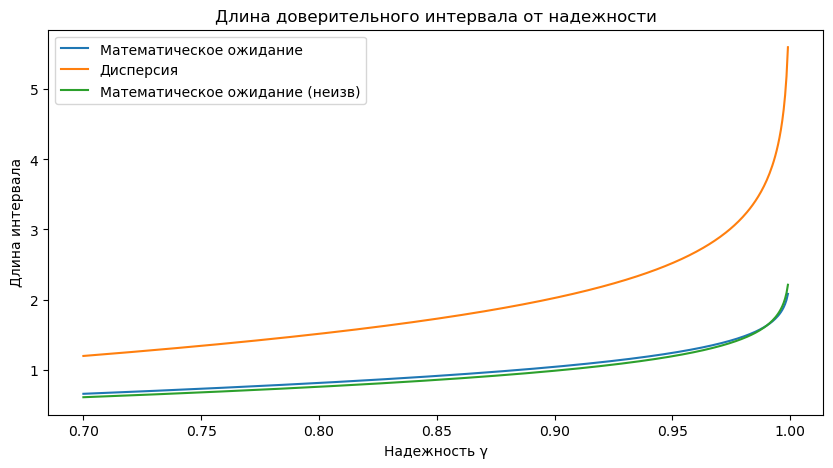

In [92]:
plt.figure(figsize=(10, 5))
plt.plot(gamma_values, interval_lengths_mx, label="Математическое ожидание")
plt.plot(gamma_values, interval_lengths_var, label="Дисперсия")
plt.plot(gamma_values, interval_lengths_mx_unknown, label="Математическое ожидание (неизв)")
plt.xlabel("Надежность γ")
plt.ylabel("Длина интервала")
plt.legend()
plt.title("Длина доверительного интервала от надежности")
plt.show()

In [93]:
# 3. Зависимость длины интервала от объема выборки
n_values = range(5, 101)
lengths_mx = []
lengths_mx_unk = []
lengths_var = []

for n in n_values:
    t_gamma_unkn = st.t.ppf(1/2 + g/2, df=n-1)
    interval_mx_unknown = 2 * sigma_estimate * t_gamma_unkn / np.sqrt(n)
    t_gamma = st.norm.ppf(1/2 + g/2)
    interval_mx = 2 * sigma * t_gamma / np.sqrt(n)
    delta_0 = st.chi2.ppf(1/2 + g/2, df=n-1)
    delta_1 = st.chi2.ppf(1/2 - g/2, df=n-1)
    interval_var = (n - 1) * s2 * (1/delta_1 - 1/delta_0)
    lengths_mx_unk.append(interval_mx_unknown)
    lengths_mx.append(interval_mx)
    lengths_var.append(interval_var)

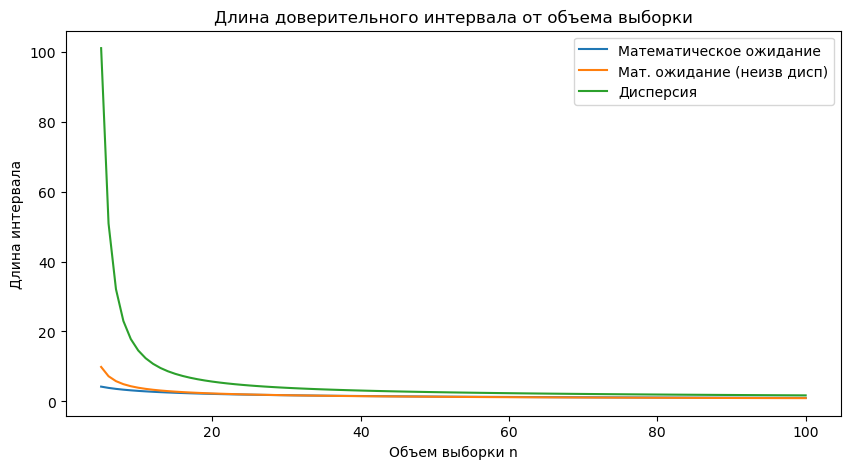

In [94]:
plt.figure(figsize=(10, 5))
plt.plot(n_values, lengths_mx, label="Математическое ожидание")
plt.plot(n_values, lengths_mx_unk, label="Мат. ожидание (неизв дисп)")
plt.plot(n_values, lengths_var, label="Дисперсия")
plt.xlabel("Объем выборки n")
plt.ylabel("Длина интервала")
plt.legend()
plt.title("Длина доверительного интервала от объема выборки")
plt.show()

In [95]:
# 4. Оценка γ* при неизвестной дисперсии
count_gamma = 0

for _ in range(M):
    X = np.random.normal(a, sigma, size=n)
    s = np.std(X, ddof=1)
    a_left = X.mean() - s * t_gamma_unknown / np.sqrt(n)
    a_right = X.mean() + s * t_gamma_unknown / np.sqrt(n)
    if a_left < a < a_right:
        count_gamma += 1

gamma_star = count_gamma / M
print("4. Фактическая γ*:", gamma_star)

4. Фактическая γ*: 0.9285714285714286


In [96]:
# 5. Анализ случайной величины Z
Z_values = []
for _ in range(M):
    X = np.random.normal(a, sigma, size=n)
    s = np.std(X, ddof=1)
    Z = (X.mean() - a) / (s / np.sqrt(n))
    Z_values.append(Z)
Z_values


[0.44553352577899297,
 0.3956667718852085,
 0.9365691454320498,
 1.4981388961428947,
 -0.057961187819331426,
 2.2788678938704927,
 -0.6983448962677774,
 0.6288715586422505,
 1.4752667933883514,
 -1.3804398832152986,
 0.21244670284918835,
 -1.3573891694116493,
 -0.10593657152165352,
 0.4422731996093767,
 -0.7511065824011882,
 0.4119820074287568,
 0.25189631928289696,
 -1.3219780931364418,
 0.5636815241346594,
 -1.874891198958924,
 0.6451627730736578,
 -0.5000417087236776,
 0.5621377111342122,
 -0.9159415573691155,
 -2.1981937662989166,
 0.4359126892500786,
 3.129667347382671,
 0.06443234754293398,
 -0.14827284994720222,
 -0.05947066969951048,
 -0.42776113580966507,
 0.8962225580482959,
 -0.09522731357592257,
 -0.06455550509064459,
 -0.23703968824493304,
 -0.9916757071250702,
 1.3011538515905567,
 1.252630556885761,
 0.6086499869756338,
 -0.18200242162506172,
 0.39455714460333907,
 -1.185074156951981,
 -0.5966031505381303,
 0.7403758345794696,
 0.3222496327212084,
 1.3745008986087148,
 1

In [97]:
# 5.1 Вычисление характеристик
Z_values = np.array(Z_values)
mean_Z = np.mean(Z_values)
var_Z = np.var(Z_values)
skew_Z = st.skew(Z_values)
kurt_Z = st.kurtosis(Z_values)
print(f"5.1. Характеристики Z: Среднее={mean_Z}, Дисперсия={var_Z}, Асимметрия={skew_Z}, Эксцесс={kurt_Z}")


5.1. Характеристики Z: Среднее=0.0068370675295270494, Дисперсия=1.0134787539796115, Асимметрия=-0.010747161974662741, Эксцесс=0.24054491114971022


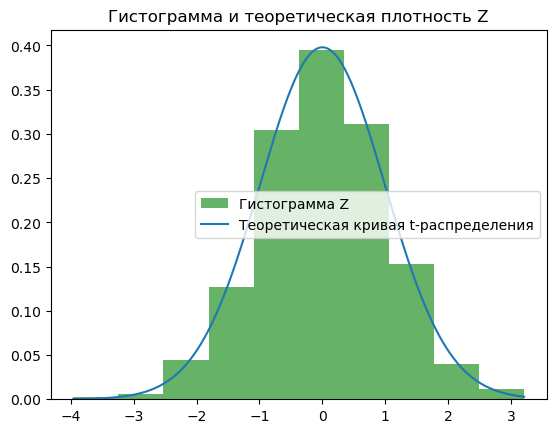

In [101]:
# 5.2 Построение графиков
plt.hist(Z_values, density=True, alpha=0.6, color='g', label="Гистограмма Z")
x = np.linspace(min(Z_values), max(Z_values), 1000)
plt.plot(x, st.t.pdf(x, df=n-1), label="Теоретическая кривая t-распределения")
plt.legend()
plt.title("Гистограмма и теоретическая плотность Z")
plt.show()

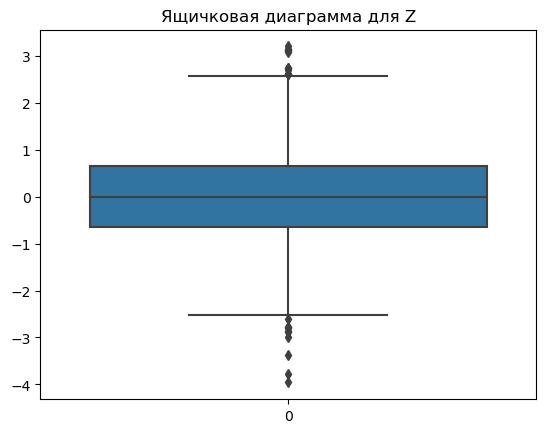

In [99]:
sb.boxplot(Z_values)
plt.title("Ящичковая диаграмма для Z")
plt.show()
